In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# reflect an existing database into a new model
base = automap_base()
base.prepare(engine, reflect=True)


# reflect the tables
Station = base.classes.station
Measurement = base.classes.measurement


In [8]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
# Create our session (link) from Python to the DB
mysession = Session(engine)

# Exploratory Climate Analysis

In [10]:
# "select * from measurement where measurement.date>1/7/2017"
engine.execute('select max(measurement.date) from measurement').fetchall()

[('2017-08-23',)]

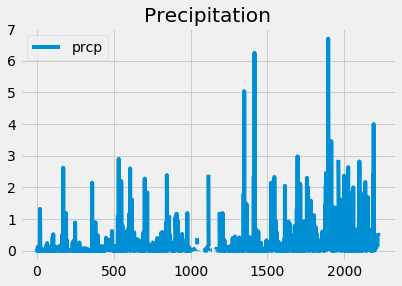

In [11]:
import datetime as dt
# Design a query to retrieve the last 12 months of precipitation data and plot the results
max_date=mysession.query(func.max(Measurement.date)).first()[0]

# strftime vs. strptime
max_date_dt=dt.datetime.strptime(max_date, '%Y-%m-%d')
start_date_dt=max_date_dt-dt.timedelta(days=365)
start_date_dt

# Calculate the date 1 year ago from the last data point in the database
result=mysession.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=start_date_dt).all()

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
pd.DataFrame(result)

# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
pd.DataFrame(result).plot(title="Precipitation")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pd.DataFrame(result).describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
stations = mysession.query(Measurement.station).distinct().count()
print(f"Stations Available: {stations} ")

Stations Available: 9 


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

stations = mysession.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(f"Most Active Stations")
stations


Most Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query,
# Most active station?

most_active_station=stations[0][0]
print(f"Most Active Station: {most_active_station}")

Most Active Station: USC00519281


In [16]:
 # Using the station id from the previous query, calculate the lowest temperature recorded
most_active_temps = mysession.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(f"Low: {most_active_temps[0][0]}")

Low: 54.0


In [17]:
 # highest temperature recorded
most_active_temps = mysession.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(f"High: {most_active_temps[0][1]}")

High: 85.0


In [18]:
 # and average temperature
most_active_temps = mysession.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(f"Average: {most_active_temps[0][2]}")

Average: 71.66378066378067


In [19]:
# Choose the station with the highest number of temperature observations.
most_active_station=stations[0][0]
print(f"Most Active Station: {most_active_station}")

Most Active Station: USC00519281


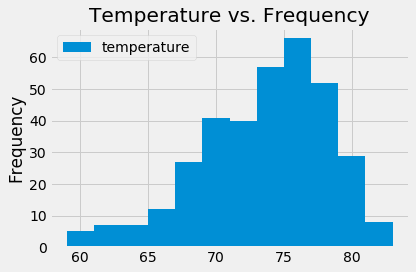

In [20]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observations = mysession.query(Measurement.tobs).filter(Measurement.date >= start_date_dt).filter(Measurement.station == most_active_station).all()
temperature_observations = pd.DataFrame(temperature_observations, columns=['temperature'])

temperature_observations.plot.hist(bins=12, title="Temperature vs. Frequency")
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'session' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
